<a href="https://colab.research.google.com/github/santoshhulbutti/ML_Concepts_Practice/blob/main/SKLearn_models_learning_session_Model_improvisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

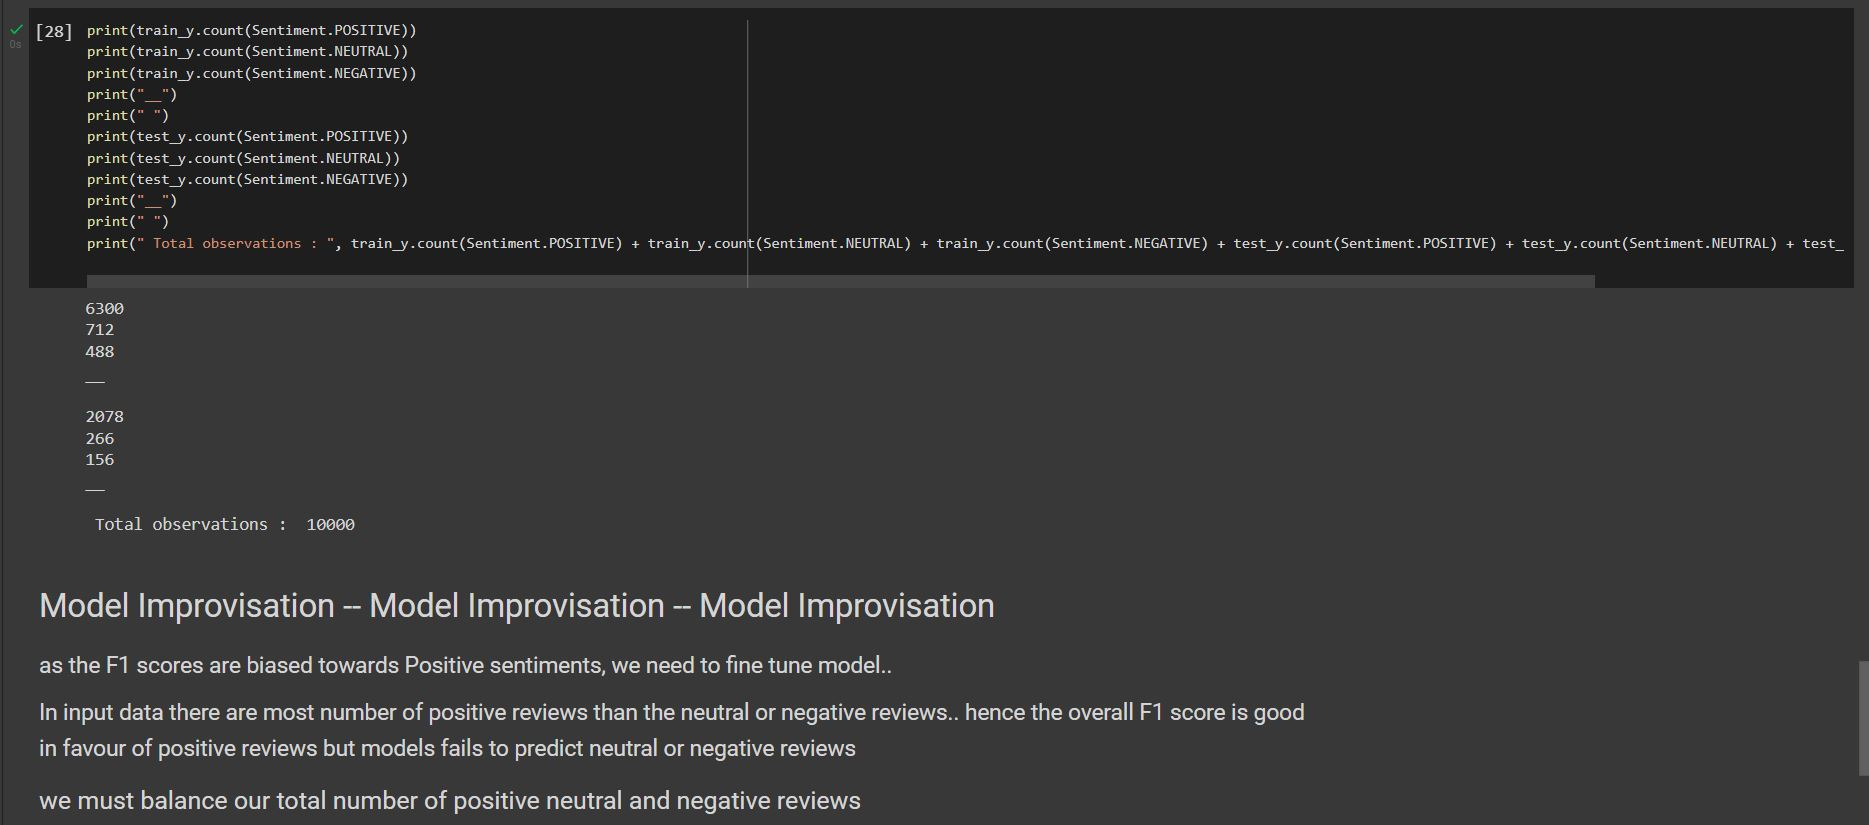

In [58]:
import random

class Sentiment:
  NEGATIVE = "NEGATIVE"
  NEUTRAL = "NEUTRAL"
  POSITIVE = "POSITIVE"

class Review:
  def __init__(self, text, score):
    self.text = text
    self.score = score
    self.sentiment = self.get_sentiment()
  
  def get_sentiment(self):
    if self.score <= 2:
      return Sentiment.NEGATIVE
    elif self.score ==3:
      return Sentiment.NEUTRAL
    else: #if score if 4 or 5
      return Sentiment.POSITIVE
  
class ReviewContainer:
  def __init__(self, reviews):
    self.reviews = reviews

  def get_text(self):
    return [x.text for x in self.reviews]

  def get_sentiment(self):
    return [x.sentiment for x in self.reviews]

  def evenly_distribute(self):
    negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
    positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
    neutral = list(filter(lambda x: x.sentiment == Sentiment.NEUTRAL, self.reviews))

    positive_shrunk = positive[:len(negative)]
    neutral_shrunk = neutral[:len(negative)]

    self.reviews = negative + positive_shrunk + neutral_shrunk
    random.shuffle(self.reviews)

    # print(negative[0].text)
    # print(len(negative))
    # print(len(positive))
    # print(len(neutral))



Cleaning data

In [59]:
import json
file_name = './sample_data/Books_small_10000.json'

reviews = []
with open(file_name) as f:
   for line in f:
     print(line)
     break

{"reviewerID": "A1F2H80A1ZNN1N", "asin": "B00GDM3NQC", "reviewerName": "Connie Correll", "helpful": [0, 0], "reviewText": "I bought both boxed sets, books 1-5.  Really a great series!  Start book 1 three weeks ago and just finished book 5.  Sloane Monroe is a great character and being able to follow her through both private life and her PI life gets a reader very involved!  Although clues may be right in front of the reader, there are twists and turns that keep one guessing until the last page!  These are books you won't be disappointed with.", "overall": 5.0, "summary": "Can't stop reading!", "unixReviewTime": 1390435200, "reviewTime": "01 23, 2014"}



Loadning data

In [60]:
with open(file_name) as f:
   for line in f:
     review = json.loads(line)
     reviews.append(Review(review['reviewText'], review['overall']))

Prep Data

In [61]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reviews, test_size = 0.25, random_state = 27)

train_container = ReviewContainer(train)
test_container = ReviewContainer(test)

In [62]:
train_container.evenly_distribute()
test_container.evenly_distribute()

train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_x = test_container.get_text()
test_y = test_container.get_sentiment()

bag of words vectorization

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

In [64]:
print(train_x[0])
print(train_x_vectors[0].toarray())
# print(train_x_vectors[0])

This was the story of Allison's best friend Sam. She was a much better friend than Mark's lover. Her idiosyncrasies regarding intimacy grew tiresome and went on and on. I enjoyed the "catch up" of Allison's and Damien's life and I loved Mark (although he was no Damien), but I would have liked more romance or mystery or SOMETHING besides Sam's freak outs throughout the story.
[[0 0 0 ... 0 0 0]]


## Classification

Linear Support Vector Machines

In [65]:
from sklearn import svm
clf_svm = svm.SVC(kernel ='linear')
clf_svm.fit(train_x_vectors, train_y)

SVC(kernel='linear')

In [66]:
test_x[0]

"Some what predictable, but good .coCounty music fans will like it better.Cowboy's love their music beer and women."

In [67]:
clf_svm.predict(test_x_vectors[0])

array(['NEGATIVE'], dtype='<U8')

Decision tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

DecisionTreeClassifier()

In [69]:
clf_dec.predict(test_x_vectors[0])

array(['POSITIVE'], dtype='<U8')

Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)

GaussianNB()

In [71]:
clf_gnb.predict(test_x_vectors[0].toarray())

array(['NEUTRAL'], dtype='<U8')

Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(solver = 'newton-cg')
clf_log.fit(train_x_vectors, train_y)

LogisticRegression(solver='newton-cg')

In [73]:
clf_log.predict(test_x_vectors[0])

array(['NEUTRAL'], dtype='<U8')

### EVALUATION  

mean accuracy

In [74]:
# for Linear Support Vector Machines
clf_svm.score(test_x_vectors, test_y)

0.5790598290598291

In [75]:
# for Decision tree classifier
clf_dec.score(test_x_vectors, test_y)

0.4444444444444444

In [76]:
# for Naive bayes - GuassianNB
clf_gnb.score(test_x_vectors.toarray(), test_y)

0.43162393162393164

In [77]:
# for logistic regression - newton-cg solver
clf_log.score(test_x_vectors, test_y)

0.6025641025641025

## F1 Score

In [78]:
from sklearn.metrics import f1_score


print(f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print(f1_score(test_y, clf_dec.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print(f1_score(test_y, clf_gnb.predict(test_x_vectors.toarray()), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print(f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))

[0.64814815 0.43537415 0.64150943]
[0.56193353 0.32903226 0.43389831]
[0.38345865 0.46341463 0.43076923]
[0.67682927 0.51147541 0.61386139]


In [79]:
print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEUTRAL))
print(train_y.count(Sentiment.NEGATIVE))
print("__")
print(" ")
print(test_y.count(Sentiment.POSITIVE))
print(test_y.count(Sentiment.NEUTRAL))
print(test_y.count(Sentiment.NEGATIVE))
print("__")
print(" ")
print(" Total observations : ", train_y.count(Sentiment.POSITIVE) + train_y.count(Sentiment.NEUTRAL) + train_y.count(Sentiment.NEGATIVE) + test_y.count(Sentiment.POSITIVE) + test_y.count(Sentiment.NEUTRAL) + test_y.count(Sentiment.NEGATIVE))


488
488
488
__
 
156
156
156
__
 
 Total observations :  1932
